In [1]:
import scanpy as sc
import anndata as ad
import infercnvpy as cnv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adata = sc.read_h5ad("/data/hanxue/hanxue_data/adata-xwt-annotated.h5ad")
adata

AnnData object with n_obs × n_vars = 159054 × 41733
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'treat', 'leiden-1', 'annotation'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'annotation_colors', 'batch_colors', 'dendrogram_annotation', 'dendrogram_leiden', 'dendrogram_leiden-1', 'gender_colors', 'hvg', 'leiden', 'leiden-1_colors', 'leiden-harmony-female_colors', 'leiden_colors', 'leiden_harmony_colors', 'log1p', 'majorType-Female_colors', 'major_type_colors', 'major_type_harmony_colors', 'minor-type_colors', 'minor_

In [3]:
def MergeSubAdata(adata, subAdata, obsName, subObsName):
    obs = pd.Series(list(adata.obs[obsName].copy()), index=adata.obs_names)
    subObs = pd.Series(list(subAdata.obs[subObsName].copy()), index=subAdata.obs_names)
    obs.loc[subObs.index] = subObs
    return pd.DataFrame(obs, columns=[obsName])


def marker(adata, groupby, method='wilcoxon', prefix=''):
    sc.tl.rank_genes_groups(adata, groupby = groupby, method = method)
    sc.tl.dendrogram(adata, groupby=groupby, use_rep='X_pca_harmony')
    sc.pl.rank_genes_groups_dotplot(adata, groupby = groupby, save=prefix+groupby+'.svg')
    return adata

def clu(adata, key_added="majorType-fix", n_neighbors=50, n_pcs=30, rep='X_pca_harmony', do_har=True, max_iter=20, do_scrublet=False, har_key='batch', resolution=1):
    # Computing the neighborhood graph
    if do_scrublet:
        n0 = adata.shape[0]
        print("{0} Cell number: {1}".format(key_added, n0))
        sc.external.pp.scrublet(adata)
        adata = adata[adata.obs['predicted_doublet']==False,:].copy()
        print("{0} Cells retained after scrublet, {1} cells reomved.".format(adata.shape[0], n0-adata.shape[0]))
    else:
        print("Ignoring processing doublet cells...")
    if do_har and len(adata.obs[har_key].cat.categories) > 1:
        sc.external.pp.harmony_integrate(adata, key=har_key,max_iter_harmony=max_iter)
        sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, use_rep=rep)
    else:
        print("Evaluating neighbors only...")
        sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, use_rep=rep)
    # Run UMAP
    sc.tl.umap(adata)
    sc.tl.leiden(adata, resolution=resolution, key_added=key_added)
    sc.pl.umap(adata, color=key_added, legend_fontoutline=True, palette=sc.pl.palettes.default_20, legend_loc="on data")
    return adata

In [4]:
adata_PVL = adata[adata.obs['major_type'] == 'PeriVascular', :]
adata_PVL

View of AnnData object with n_obs × n_vars = 12734 × 41733
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'treat', 'leiden-1', 'annotation'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'annotation_colors', 'batch_colors', 'dendrogram_annotation', 'dendrogram_leiden', 'dendrogram_leiden-1', 'gender_colors', 'hvg', 'leiden', 'leiden-1_colors', 'leiden-harmony-female_colors', 'leiden_colors', 'leiden_harmony_colors', 'log1p', 'majorType-Female_colors', 'major_type_colors', 'major_type_harmony_colors', 'minor-type_colors', 

Ignoring processing doublet cells...


2025-09-28 08:22:06,316 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-09-28 08:22:08,860 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-09-28 08:22:08,997 - harmonypy - INFO - Iteration 1 of 20
2025-09-28 08:22:11,891 - harmonypy - INFO - Iteration 2 of 20
2025-09-28 08:22:14,864 - harmonypy - INFO - Iteration 3 of 20
2025-09-28 08:22:17,860 - harmonypy - INFO - Iteration 4 of 20
2025-09-28 08:22:20,732 - harmonypy - INFO - Iteration 5 of 20
2025-09-28 08:22:21,857 - harmonypy - INFO - Iteration 6 of 20
2025-09-28 08:22:22,754 - harmonypy - INFO - Iteration 7 of 20
2025-09-28 08:22:23,627 - harmonypy - INFO - Iteration 8 of 20
2025-09-28 08:22:24,612 - harmonypy - INFO - Converged after 8 iterations
/home/hanxue/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/external/pp/_harmony_integrate.py:101: ImplicitModificationWarning: Setting element `.obsm['X_pca_harmony']` of view, initializing view as actual.
  adata.obsm[adjust

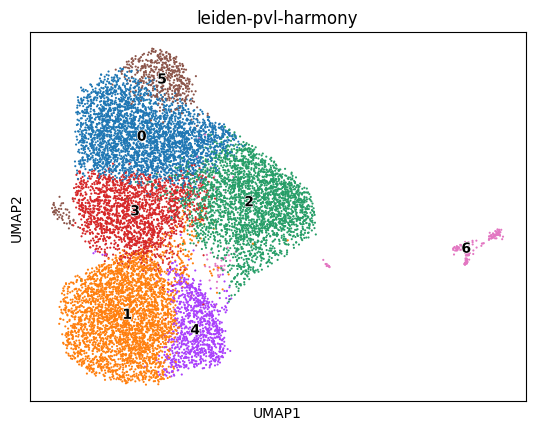

In [5]:
adata_PVL = clu(adata_PVL, 'leiden-pvl-harmony', resolution=0.5)

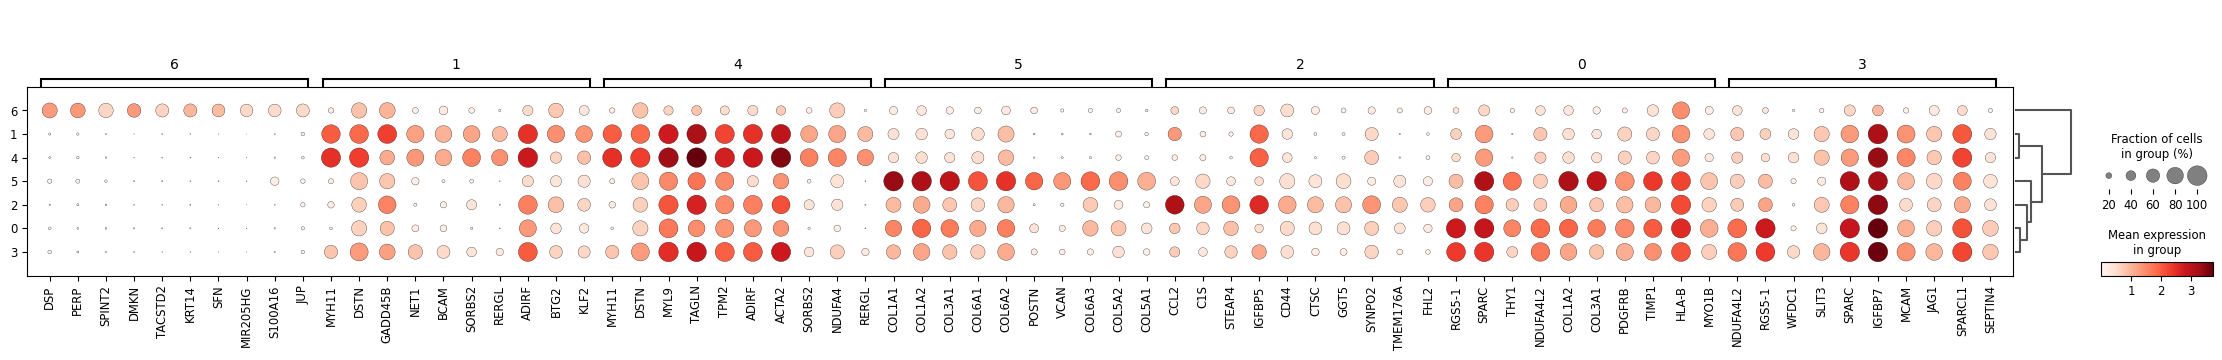

In [8]:
adata_PVL = marker(adata_PVL, 'leiden-pvl-harmony')

categories: 0, 1, 2, etc.
var_group_labels: Pericytes, VSMCs, Mesenchymal-like PVL


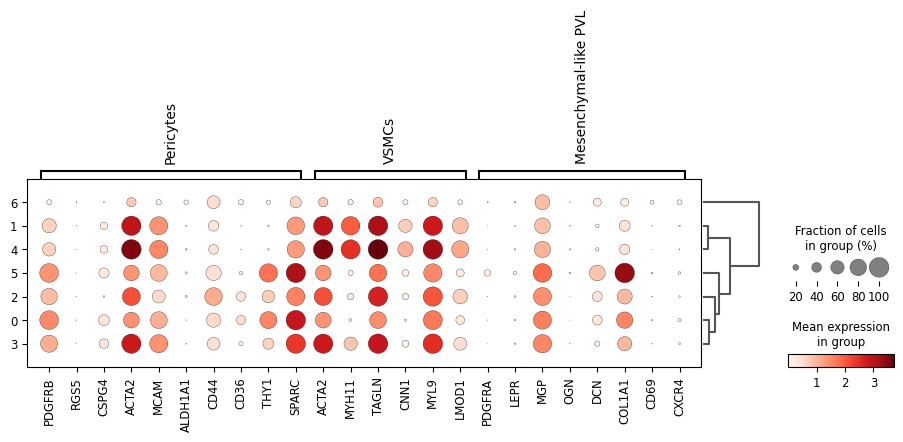

In [12]:
marker_dict = {
    "Pericytes": ["PDGFRB", "RGS5", "CSPG4", "ACTA2", "MCAM", "ALDH1A1", "CD44", "CD36", "THY1", "SPARC"],
    "VSMCs": ["ACTA2", "MYH11", "TAGLN", "CNN1", "MYL9", "LMOD1"],
    "Mesenchymal-like PVL": ["PDGFRA", "LEPR", "MGP", "OGN", "DCN", "COL1A1", "CD69", "CXCR4"]
}
sc.pl.dotplot(adata_PVL, marker_dict, groupby='leiden-pvl-harmony',dendrogram=True) 

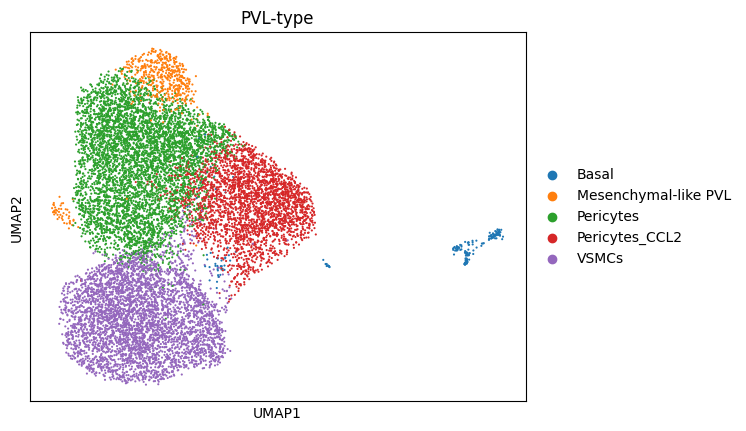

In [6]:
adata_PVL.obs['PVL-type'] = 'PVL unassigned'
adata_PVL.obs.loc[  
    adata_PVL.obs["leiden-pvl-harmony"].isin([ '2']), "PVL-type"
] = "Pericytes_CCL2"
adata_PVL.obs.loc[  
    adata_PVL.obs["leiden-pvl-harmony"].isin([ '0', '3']), "PVL-type"
] = "Pericytes"
adata_PVL.obs.loc[  
    adata_PVL.obs["leiden-pvl-harmony"].isin(['1', '4']), "PVL-type"
] = "VSMCs"
adata_PVL.obs.loc[  
    adata_PVL.obs["leiden-pvl-harmony"].isin(['5']), "PVL-type"
] = "Mesenchymal-like PVL"
adata_PVL.obs.loc[  
    adata_PVL.obs["leiden-pvl-harmony"].isin(['6']), "PVL-type"
] = "Basal"
sc.pl.umap(adata_PVL, color='PVL-type', save = '-PVL.svg')

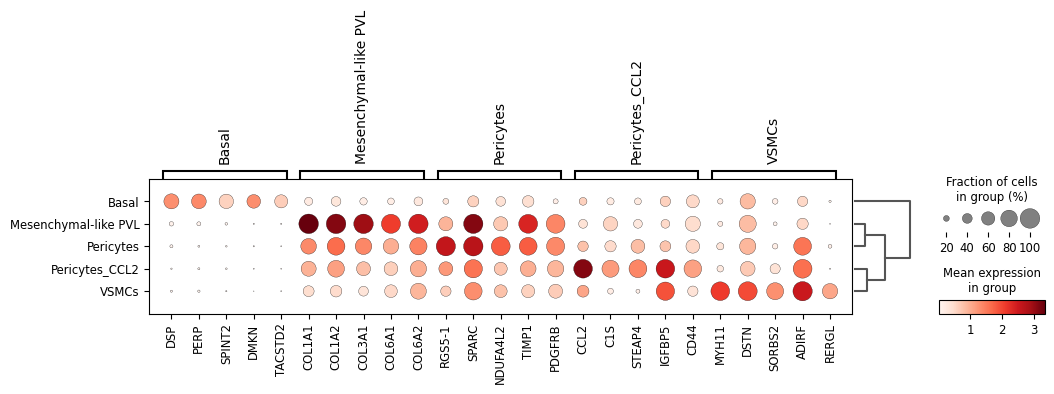

In [7]:
sc.tl.rank_genes_groups(adata_PVL, groupby='PVL-type', method='wilcoxon')
sc.tl.dendrogram(adata_PVL, groupby='PVL-type')
sc.pl.rank_genes_groups_dotplot(adata_PVL, groupby='PVL-type', n_genes=5, save='-PVL.svg')

In [15]:
adata_PVL.write_h5ad("adata-PVL.h5ad")